In [31]:
import os 
cwd = os.getcwd()
cwd

os.chdir("/Users/jmthomas565/Desktop/Education/Birkbeck Econ/Econometrics Paper/Project Data")

In [112]:
import pandas as pd

house_prices = pd.read_csv ("AVG House Prices.csv")

boe_interest_rates = pd.read_csv ("Bank Rate history and data  Bank of England Database.csv")


In [114]:
boe_interest_rates.dtypes

Date Changed     object
Rate            float64
dtype: object

# Cleansing House Prices data 

In [116]:
house_prices_pivotted = house_prices.pivot(index='Date', columns='Region_Name', values='Average_Price')

house_prices_pivotted = house_prices_pivotted.rename_axis(None).rename_axis(None, axis=1)

house_prices_pivotted.index.name = "Date"

house_prices_pivotted.index = pd.to_datetime(house_prices_pivotted.index).strftime('%Y')

uk_house_prices = house_prices_pivotted[["United Kingdom"]]

uk_house_prices = uk_house_prices.groupby('Date').mean()

uk_house_prices.index = uk_house_prices.index.astype('int64') 

uk_house_prices.rename(columns={"United Kingdom": "house_prices"}, inplace=True)


# Cleansing BOE Interest Rate 

In [158]:
boe_interest_rates = boe_interest_rates.set_index ("Date Changed")

boe_interest_rates.index = pd.to_datetime(boe_interest_rates.index).strftime('%Y')

boe_interest_rates = boe_interest_rates.groupby('Date Changed').mean()

boe_interest_rates.rename(columns={"Rate": "interest_rate"}, inplace=True)

boe_interest_rates.head()


KeyError: "None of ['Date Changed'] are in the columns"

# Inputing missing values, where interest rate is unchanged

In [122]:
data = {
    'Date Changed': [2010, 2011, 2012, 2013, 2014, 2015, 2019, 2002],
    'interest_rate': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.750000, 4.964286],
}

df = pd.DataFrame(data)

df = df.set_index(['Date Changed'])

df.head(20)


,interest_rate
Date Changed,
2010,0.500000
2011,0.500000
2012,0.500000
2013,0.500000
2014,0.500000
2015,0.500000
2019,0.750000
2002,4.964286


In [124]:
boe_interest_rates.head()

,interest_rate
Date Changed,
1975,10.846154
1976,11.678571
1977,8.960526
1978,9.041667
1979,14.000000


In [126]:
boe_interest_rates = pd.concat([boe_interest_rates, df])

boe_interest_rates.index = boe_interest_rates.index.astype('int64') 

boe_interest_rates = boe_interest_rates.sort_index()

# Merging House Prices to Interest Rates

In [160]:
merged_data = boe_interest_rates.merge(uk_house_prices, how="left", left_index=True, right_index=True)

In [162]:
merged_data.head()

,interest_rate,house_prices
Date Changed,,
1975,10.846154,9529.757632
1976,11.678571,10372.559850
1977,8.960526,11134.128123
1978,9.041667,12956.814850
1979,14.000000,16764.656208


# Plotting the Data (with no transformations)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


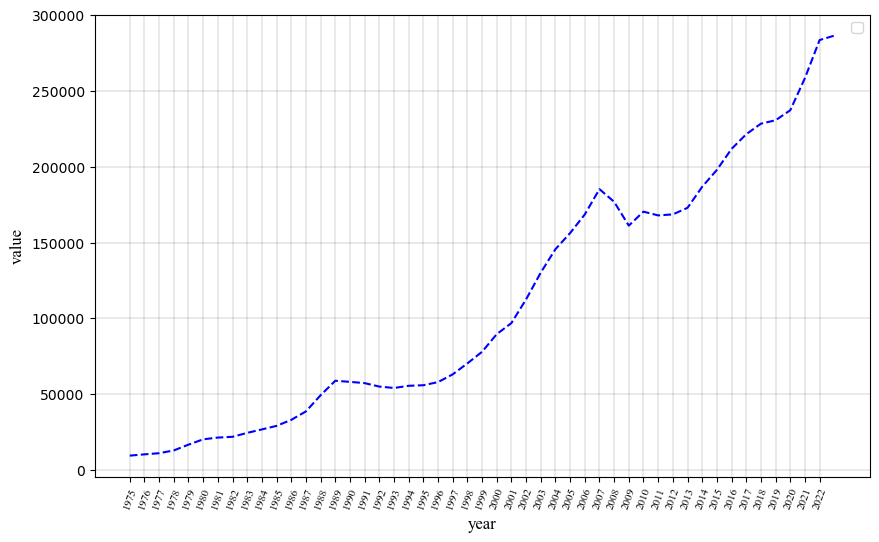

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
fig,ax = plt.subplots(figsize=(10,6))


plt.plot(merged_data.index, merged_data['house_prices'], c='b', linestyle='dashed')

plt.xticks(rotation=70, size=10, fontname="Times new roman")


plt.xlabel("year", size=12, fontname="Times new roman")
plt.ylabel("value", size=12, fontname="Times new roman")

plt.xticks(rotation=70, size=8)

plt.xticks(np.arange(1975, 2023, step=1))

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)

plt.legend()

plt.show()

# Plotting the Data - With Logged House Prices

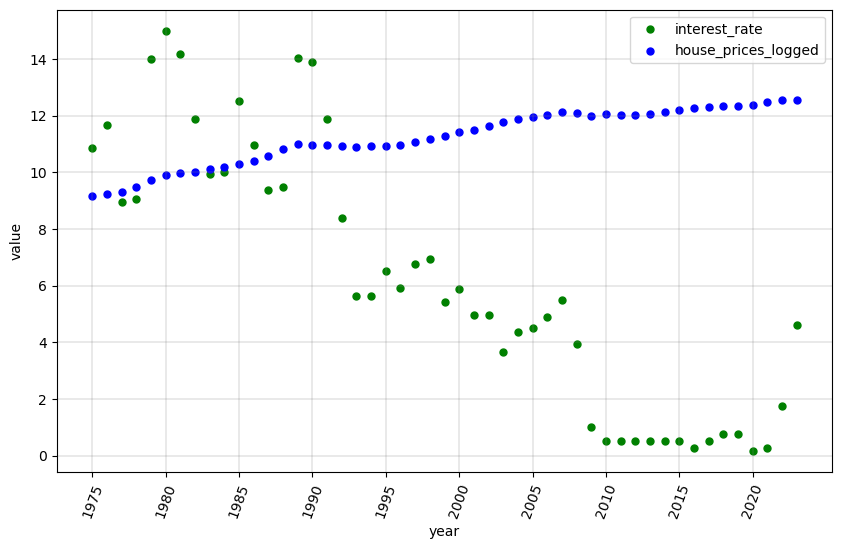

In [166]:
fig,ax = plt.subplots(figsize=(10,6))

merged_data["house_prices_logged"] = np.log(merged_data['house_prices'])

plt.scatter(merged_data.index, merged_data['interest_rate'], label = "interest_rate", s=25, c='g')

plt.scatter(merged_data.index, merged_data["house_prices_logged"], label = "house_prices_logged", s=25, c='b')

plt.xticks(rotation=70, size=10)


plt.xticks(np.arange(1975, 2023, step=5))

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)


plt.xlabel("year")
plt.ylabel("value")

plt.legend()

plt.show()




# Plotting the Regression - House Prices on Rates (Not Logged)

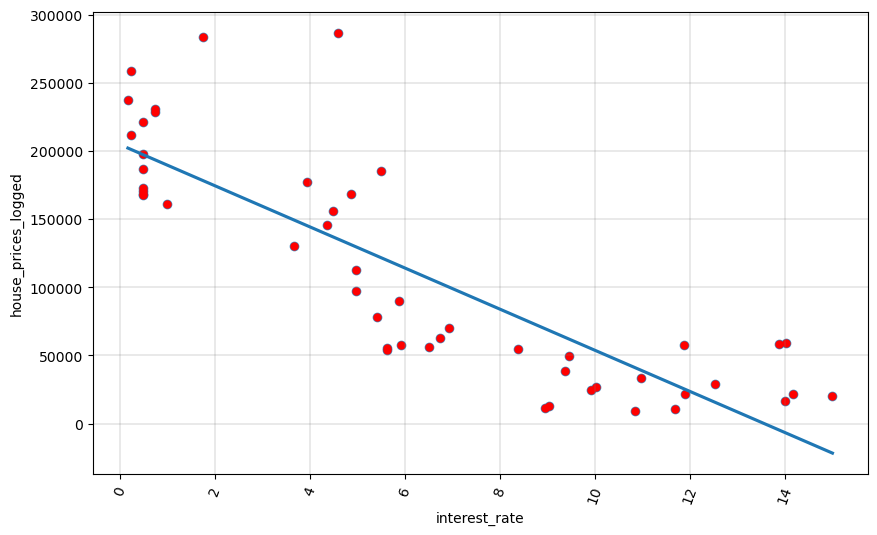

In [168]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,6))



plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)

sns.regplot(x=merged_data['interest_rate'], y=merged_data['house_prices'], data=merged_data, ci=None)

plt.scatter(merged_data['interest_rate'], merged_data['house_prices'], s=25, c='r')

plt.xticks(rotation=70, size=10)

plt.xlabel("interest_rate")
plt.ylabel("house_prices_logged")


plt.show()


# Plotting the Regression - House Prices on Rates (Logged)

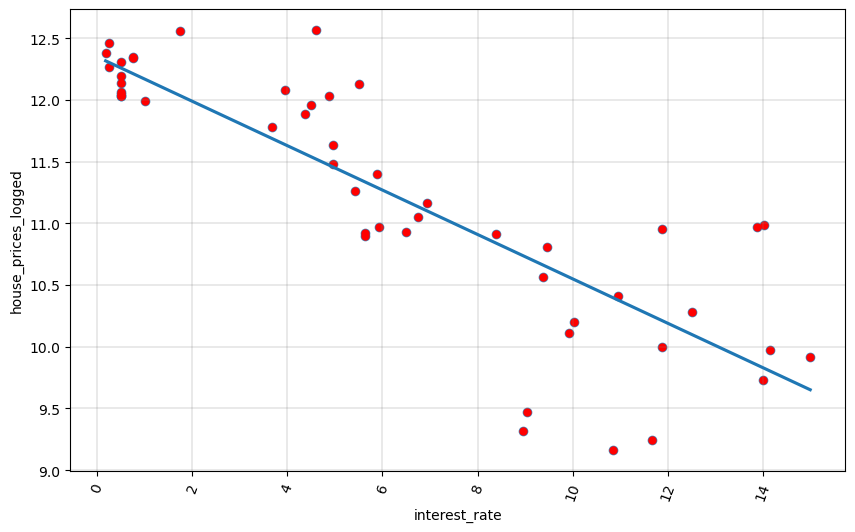

In [170]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,6))



plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)

sns.regplot(x=merged_data['interest_rate'], y=merged_data['house_prices_logged'], data=merged_data, ci=None)

plt.scatter(merged_data['interest_rate'], merged_data['house_prices_logged'], s=25, c='r')

plt.xticks(rotation=70, size=10)

plt.xlabel("interest_rate")
plt.ylabel("house_prices_logged")


plt.show()


# Running the Regression - House Prices on Rates (Not Logged)

In [172]:
import statsmodels.api as sm
import pandas as pd

from statsmodels.api import add_constant

result = sm.OLS(merged_data['house_prices'], sm.tools.add_constant(merged_data['interest_rate'])).fit()

# printing the summary table
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           house_prices   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           3.46e-14
Time:                        10:11:10   Log-Likelihood:                -594.03
No. Observations:                  49   AIC:                             1192.
Df Residuals:                      47   BIC:                             1196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.047e+05   1.09e+04     18.761

# Running the Regression - House Prices on Rates (Logged)

In [174]:
import statsmodels.api as sm
import pandas as pd

from statsmodels.api import add_constant

result = sm.OLS(merged_data['house_prices_logged'], sm.tools.add_constant(merged_data['interest_rate'])).fit()

# printing the summary table
print(result.summary())


                             OLS Regression Results                            
Dep. Variable:     house_prices_logged   R-squared:                       0.714
Model:                             OLS   Adj. R-squared:                  0.708
Method:                  Least Squares   F-statistic:                     117.2
Date:                 Tue, 24 Jun 2025   Prob (F-statistic):           2.33e-14
Time:                         10:11:14   Log-Likelihood:                -37.885
No. Observations:                   49   AIC:                             79.77
Df Residuals:                       47   BIC:                             83.55
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.3476      0.128 

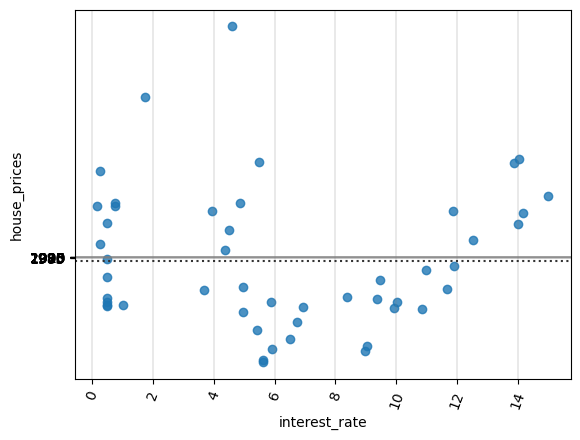

In [176]:
# import packages and libraries 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)
  
sns.residplot(x='interest_rate', y='house_prices', data=merged_data) 

plt.xticks(rotation=70, size=10)

plt.yticks(np.arange(1975, 2023, step=5))

  
plt.show() 

In [ ]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,6))





sns.regplot(x=merged_data['interest_rate'], y=merged_data['house_prices_logged'], data=merged_data, ci=None)

plt.scatter(merged_data['interest_rate'], merged_data['house_prices_logged'], s=25, c='r')



plt.show()


# Cleansing GDP Data

In [ ]:
gdp = pd.read_csv ("GDP - UK.csv")

gdp = gdp.set_index ("Date")

merged_data.index = merged_data.index.astype('int64') 


In [ ]:
merged_data_with_gdp = merged_data.merge(gdp, how="left", left_index=True, right_index=True)

merged_data_with_gdp.head()

In [ ]:
merged_data_with_gdp["gdp_logged"] = np.log(merged_data_with_gdp["GDP"])

In [ ]:
merged_data_with_gdp.rename(columns ={"GDP": "gdp"}, inplace= True)


In [ ]:
merged_data_with_gdp.head()

# Plotting with GDP Data

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))

plt.scatter(merged_data_with_gdp.index, merged_data_with_gdp['interest_rate'], label = "interest_rate", s=25, c='g')

plt.scatter(merged_data_with_gdp.index, merged_data_with_gdp["house_prices_logged"], label = "UK_Houses_Logged", s=25, c='b')

plt.scatter(merged_data_with_gdp.index, merged_data_with_gdp["gdp_logged"], label = "gdp_logged", s=25, c='r')


plt.xticks(rotation=70, size=10)


plt.xticks(np.arange(1975, 2023, step=5))

plt.yticks(np.arange(-1, 17, step=1))

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)


plt.xlabel("year")
plt.ylabel("value")


plt.legend()

plt.show()


# Cleansing Employment Rate Data

In [ ]:
employmnet_rates = pd.read_csv ("Employment Rate Data.csv")

employmnet_rates = employmnet_rates.set_index ("Year")

employmnet_rates.index = employmnet_rates.index.astype('int64') 

employmnet_rates.rename(columns ={"Employment Rate": "employment_rate"}, inplace = True)


# Merging Employment Rate Data with Master Table

In [ ]:
merged_data_with_employment = merged_data_with_gdp.merge(employmnet_rates, how="left", left_index=True, right_index=True)

merged_data_with_employment.head()


# Plotting All Variables ---- Y Axis needs amending! 

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))

plt.scatter(merged_data_with_employment.index, merged_data_with_employment['interest_rate'], label = "interest_rate", s=25, c='g')

plt.scatter(merged_data_with_employment.index, merged_data_with_employment["house_prices_logged"], label = "house_prices_logged", s=25, c='b')

plt.scatter(merged_data_with_employment.index, merged_data_with_employment["gdp_logged"], label = "gdp_logged", s=25, c='r')

plt.scatter(merged_data_with_employment.index, merged_data_with_employment["employment_rate"], label = "employment_rate", s=25, c='y')

plt.xticks(rotation=70, size=10)

plt.xticks(np.arange(1975, 2023, step=5))

plt.yticks(np.arange(-1, 101, step=10))


plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)


plt.xlabel("year")
plt.ylabel("value")


plt.legend()

plt.show()



# Transforming Employment Rate

In [ ]:
merged_data_with_employment[["employment_rate_div_10"]] = merged_data_with_employment[["employment_rate"]]/ 10

merged_data_with_employment = merged_data_with_employment.drop(2023)

merged_data_with_employment.tail()

# Graphing all Variables

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))

plt.scatter(merged_data_with_employment.index, merged_data_with_employment['interest_rate'], label = "interest_rate", s=25, c='g')

plt.scatter(merged_data_with_employment.index, merged_data_with_employment["house_prices_logged"], label = "house_prices_logged", s=25, c='b')

plt.scatter(merged_data_with_employment.index, merged_data_with_employment["gdp_logged"], label = "gdp_logged", s=25, c='r')

plt.scatter(merged_data_with_employment.index, merged_data_with_employment["employment_rate_div_10"], label = "employment_rate_div_10", s=25, c='y')

plt.xticks(rotation=70, size=10)

plt.xticks(np.arange(1975, 2023, step=5))

plt.yticks(np.arange(-1, 19, step=1))


plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)


plt.xlabel("year")
plt.ylabel("value")


plt.legend()

plt.show()



# OLS Model with transformed variables

In [ ]:
X = merged_data_with_employment [["employment_rate_div_10", "gdp_logged", "interest_rate"]]

Y = merged_data_with_employment [["house_prices_logged"]]

In [ ]:
X.head()

In [ ]:
multivariate_result = sm.OLS(Y, sm.add_constant(X)).fit()


# printing the summary table
print(multivariate_result.summary())


# Adding Lagged Variables

In [ ]:
merged_data_with_employment['house_prices_logged_lag_1'] = merged_data_with_employment['house_prices_logged'].shift(-1)

merged_data_with_employment['gdp_logged_lag_1'] = merged_data_with_employment['gdp_logged'].shift(-1)

merged_data_with_employment['interest_rate_lag_1'] = merged_data_with_employment['interest_rate'].shift(-1)

merged_data_with_employment['employment_rate_div_10_lag_1'] = merged_data_with_employment['employment_rate_div_10'].shift(-1)

merged_data_with_employment['house_prices_logged_lag_2'] = merged_data_with_employment['house_prices_logged'].shift(-2)

merged_data_with_employment['gdp_logged_lag_2'] = merged_data_with_employment['gdp_logged'].shift(-2)

merged_data_with_employment['interest_rate_lag_2'] = merged_data_with_employment['interest_rate'].shift(-2)

merged_data_with_employment['employment_rate_div_10_lag_2'] = merged_data_with_employment['employment_rate_div_10'].shift(-2)

In [ ]:
final_df = merged_data_with_employment[["house_prices_logged", "house_prices_logged_lag_1", "house_prices_logged_lag_2", 
                                        "interest_rate", "interest_rate_lag_1", "interest_rate_lag_2",
                                        "gdp_logged", "gdp_logged_lag_1", "gdp_logged_lag_2",
                                        "employment_rate_div_10", "employment_rate_div_10_lag_1", "employment_rate_div_10_lag_2"]]


In [ ]:
#Dropping rows, because lags are meaning that we now have less rows in data. This is reducing our degrees of freedom! 
#Mention this in the assignment
#Could try these 2 models - one with lags (and excluded rows) and one without. Mention the playoff between DOF and more useful variables. 


In [ ]:
final_df = final_df.drop(2021)

final_df = final_df.drop(2022)

final_df.tail()

# Running the Model with Lagged Variables 

In [ ]:
kitchen_sink_y = final_df[["house_prices_logged"]]

kitchen_sink_x = final_df[['house_prices_logged_lag_1', 'house_prices_logged_lag_2',
       'interest_rate', 'interest_rate_lag_1', 'interest_rate_lag_2', 'gdp_logged', 'gdp_logged_lag_1',
       'gdp_logged_lag_2', 'employment_rate_div_10',
       'employment_rate_div_10_lag_1', 'employment_rate_div_10_lag_2']]


In [ ]:

kitchen_sink_result = sm.OLS(kitchen_sink_y, sm.add_constant(kitchen_sink_x)).fit()


# printing the summary table
print(kitchen_sink_result.summary())


In [ ]:
merged